to inference using finetuned_scGPT, the query data needs to have X_pca and X_umap.
After importing the Anndata object, additional pre-processing is needed before putting model through the data.

In [5]:
from pathlib import Path
import scanpy as sc

In [3]:
data_dir = Path("./sample_data_cell_ann")

In [6]:
# examine the dataset
ref_cdata = sc.read_h5ad(data_dir/"c_data.h5ad")
query_adata = sc.read_h5ad(data_dir/"filtered_ms_adata.h5ad") 
cart_data = sc.read_h5ad(data_dir/"Tcell_singleR_500.h5ad") 

In [8]:
cart_data.var_names_make_unique()


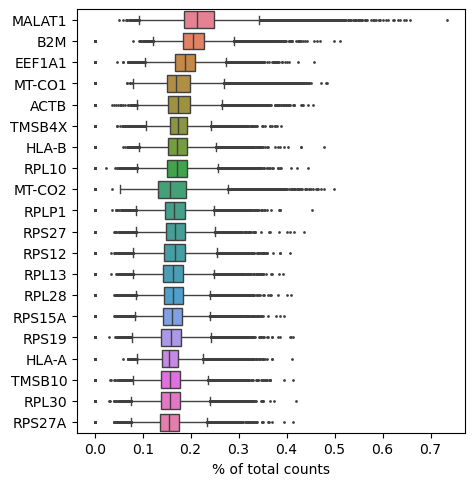

In [13]:
sc.pl.highest_expr_genes(cart_data, n_top=20)

In [14]:
sc.tl.pca(cart_data, svd_solver='arpack')

/home/bench-user/.apps/conda/envs/rtd/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


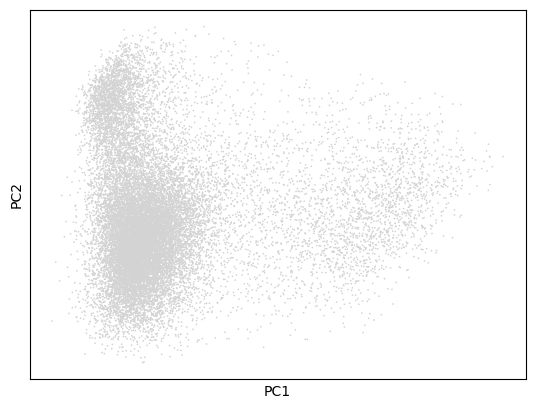

In [23]:
sc.pl.pca(cart_data)

In [55]:
cart_data

AnnData object with n_obs × n_vars = 20741 × 36604
    obs: 'nCount_RNA', 'nFeature_RNA', 'construct', 'patient_id', 'cell_subset', 'Response_6m', 'leiden'
    var: 'features'
    uns: 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [32]:
# compute a neighborhood graph of cells
if 'neighbors' not in cart_data.uns:
    sc.pp.neighbors(cart_data)    

sc.tl.leiden(cart_data)

In [33]:
# partitioin based graph abstraction computes a graph representing the manifold of cells, where each node represent a cluster (or partitiion) and edges represents
# connections between the clusters. 
sc.tl.paga(cart_data, groups='leiden')
sc.pl.paga(cart_data, plot=False)
sc.tl.umap(cart_data, init_pos='paga')

In [34]:
sc.tl.umap(cart_data)

/home/bench-user/.apps/conda/envs/rtd/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


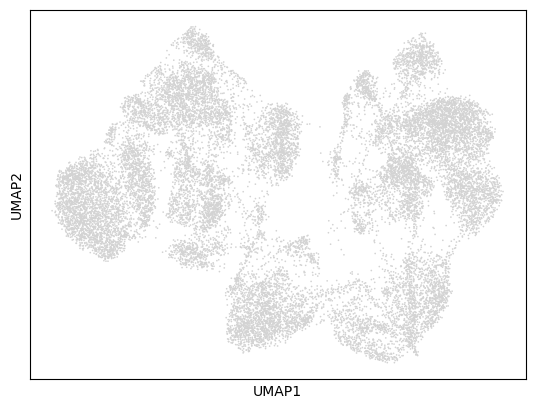

In [36]:
sc.pl.umap(cart_data)

In [46]:
if '_index' in cart_data.var.columns:
    # Rename the column in var
    cart_data.var.rename(columns={'_index': 'index_renamed'}, inplace=True)

In [52]:
if '_index' in cart_data.raw.var.columns:
    # Rename the column in var
    cart_data.raw.var.rename(columns={'_index': 'index_renamed'}, inplace=True)

In [53]:
cart_data.raw.var.columns

Index(['index_renamed'], dtype='object')

In [54]:
cart_data.write(data_dir/"pp_Tcell_data.h5ad")